<a href="https://colab.research.google.com/github/mdonbruce/AspNetDocs/blob/master/Data_as_Matrices_SVD_Activity_EDITABLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Data as Matrices — ML Task Classification + SVD Exploration
**In-Class Activity (Group-Based + Individual Practice)**

This notebook is designed for **Google Colab or Jupyter** and walks through the activity step-by-step.

**Required file:** `matrix_image_patches.csv` (included in the package)

✅ **Colab tip:** Left sidebar → **Files** → **Upload** → select `matrix_image_patches.csv`.


## 🔹 Part 1 — ML Problem Sorting Activity

### 🧠 Scenarios (12)

**1. Email Spam Filter** — A system marks incoming emails as “Spam” or “Not Spam” using past examples of labeled emails.

**2. Customer Segmentation for Marketing** — A marketing team groups customers into distinct segments based only on purchase history and demographic data, without any predefined labels.

**3. Autonomous Driving in a Simulator** — A self-driving car agent learns to drive safely in a simulated environment by receiving positive rewards for staying in lane and negative rewards for collisions.

**4. Loan Default Prediction** — A bank predicts whether a customer will default on a loan based on income, credit score, existing loans, and historical repayment data labeled as “Default” or “No Default”.

**5. Anomaly Detection in Network Traffic** — A cybersecurity system analyzes unlabeled network traffic logs and flags unusual patterns that don’t fit typical behavior profiles.

**6. Recommender System for Streaming Service** — A platform suggests movies based on a user’s past viewing history, ratings, and similarity to other users’ behavior.

**7. Robot Maze Navigation** — A robot learns to exit a maze by trial and error, getting positive rewards for moving closer to the exit and negative rewards for hitting walls.

**8. House Price Prediction** — A model predicts house prices from features such as square footage, number of bedrooms, and neighborhood, using historical labeled sales data.

**9. Topic Discovery in News Articles** — A news company wants to discover hidden topics across thousands of articles without any labeled topics.

**10. Dynamic Ad Bidding** — An online ad agent learns how much to bid for ad impressions to maximize long-term click-through rewards.

**11. Handwritten Digit Recognition** — A model classifies images of handwritten digits (0–9) using a dataset with each image labeled with the correct digit.

**12. Image Color Compression** — A system reduces the number of colors in an image to compress it while maintaining visual similarity, clustering similar colors together.

### ✅ Deliverable (Group)
| Scenario # | ML Type | Inputs | Labels/Rewards | ML Sub-Type | Justification |
|---:|---|---|---|---|---|
| 1 |  |  |  |  |  |


## 🔧 Setup


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('✅ Libraries imported.')


✅ Libraries imported.


## 🔹 Part 2A — Analytical Warm-Up (3×3 Matrix)


In [ ]:
A = np.array([[52, 68, 66],
              [55, 62, 70],
              [61, 59, 75]], dtype=float)

rank_A = np.linalg.matrix_rank(A)
det_A = np.linalg.det(A)
eigvals, _ = np.linalg.eig(A)

print('A =\n', A)
print('\nRank(A):', rank_A)
print('det(A):', det_A)
print('\nEigenvalues(A):')
print(eigvals)


A =
 [[52. 68. 66.]
 [55. 62. 70.]
 [61. 59. 75.]]

Rank(A): 3
det(A): 1458.000000000008

Eigenvalues(A):
[189.68369861+0.j          -0.3418493 +2.75129411j
  -0.3418493 -2.75129411j]


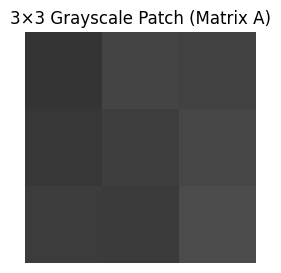

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(A, cmap='gray', vmin=0, vmax=255)
plt.title('3×3 Grayscale Patch (Matrix A)')
plt.axis('off')
plt.show()


In [ ]:
U, S, VT = np.linalg.svd(A, full_matrices=False)
print('Singular values:', S)

def recon_k(k):
    Uk = U[:, :k]
    Sk = np.diag(S[:k])
    Vk = VT[:k, :]
    return Uk @ Sk @ Vk

for k in [1, 2, 3]:
    Ak = recon_k(k)
    mse = np.mean((A - Ak)**2)
    print(f'k={k} MSE={mse:.4f}')


Singular values: [190.18774264  10.39609477   0.73740278]
k=1 MSE=12.0692
k=2 MSE=0.0604
k=3 MSE=0.0000


## 🔹 Part 2B — Coding Lab with Large Dataset (500 patches)


In [ ]:
df = pd.read_csv('matrix_image_patches.csv')
print('Shape:', df.shape)
display(df.head())

# IMPORTANT: exclude patch_id (it starts with 'p'!)
pixel_cols = [c for c in df.columns if (c.startswith('p') and c[1:].isdigit())]
A = df[pixel_cols].values.astype(float)
print('Pixel columns:', pixel_cols)
print('Matrix A shape:', A.shape)


Shape: (500, 10)


,patch_id,p1,p2,p3,p4,p5,p6,p7,p8,p9
0,1,115,91,110,83,153,154,102,154,123
1,2,121,145,148,162,183,187,98,123,96
2,3,122,116,121,123,135,127,116,125,120
3,4,124,108,97,103,101,93,147,128,127
4,5,119,108,123,116,89,98,117,120,156


Pixel columns: ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9']
Matrix A shape: (500, 9)


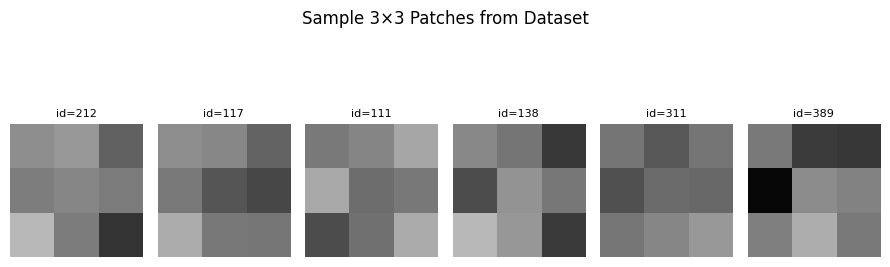

In [ ]:
idx = np.random.choice(len(A), size=6, replace=False)
plt.figure(figsize=(9,3))
for i, j in enumerate(idx, start=1):
    patch = A[j].reshape(3,3)
    plt.subplot(1,6,i)
    plt.imshow(patch, cmap='gray', vmin=0, vmax=255)
    plt.title(f"id={int(df.loc[j,'patch_id'])}", fontsize=8)
    plt.axis('off')
plt.suptitle('Sample 3×3 Patches from Dataset', y=1.05)
plt.tight_layout()
plt.show()


In [ ]:
A_mean = A.mean(axis=0, keepdims=True)
A_centered = A - A_mean
rank_centered = np.linalg.matrix_rank(A_centered)
print('Rank of centered A:', rank_centered)


Rank of centered A: 9


First 15 singular values:
[1342.3227961  1264.88776945  868.20005415   90.06912102   84.88776059
   83.83821768   80.59231329   77.61275245   75.02693006]


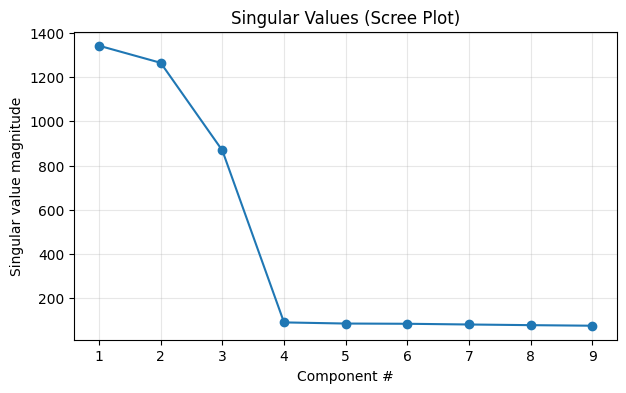

In [ ]:
U, S, VT = np.linalg.svd(A_centered, full_matrices=False)
print('First 15 singular values:')
print(S[:15])

plt.figure(figsize=(7,4))
plt.plot(np.arange(1, len(S)+1), S, marker='o')
plt.title('Singular Values (Scree Plot)')
plt.xlabel('Component #')
plt.ylabel('Singular value magnitude')
plt.grid(True, alpha=0.3)
plt.show()


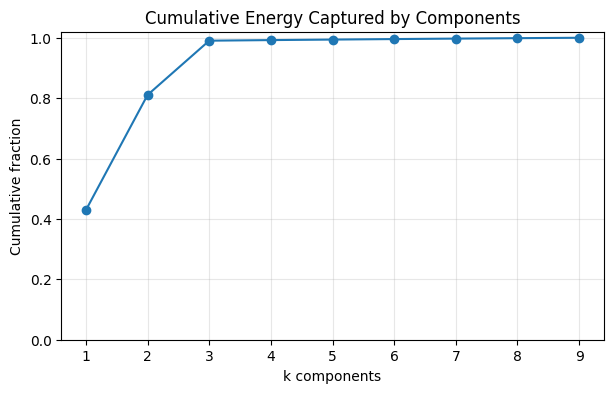

k=1: 42.94% energy
k=2: 81.07% energy
k=3: 99.03% energy
k=4: 99.23% energy
k=5: 99.40% energy
k=6: 99.57% energy
k=7: 99.72% energy
k=8: 99.87% energy
k=9: 100.00% energy


In [ ]:
energy = S**2
cum = np.cumsum(energy) / np.sum(energy)

plt.figure(figsize=(7,4))
plt.plot(np.arange(1, len(cum)+1), cum, marker='o')
plt.title('Cumulative Energy Captured by Components')
plt.xlabel('k components')
plt.ylabel('Cumulative fraction')
plt.ylim(0, 1.02)
plt.grid(True, alpha=0.3)
plt.show()

for k in [1,2,3,4,5,6,7,8,9]:
    print(f'k={k}: {cum[k-1]*100:.2f}% energy')


In [ ]:
def reconstruct_with_k(k: int):
    Uk = U[:, :k]
    Sk = np.diag(S[:k])
    Vk = VT[:k, :]
    A_k_centered = Uk @ Sk @ Vk
    return A_k_centered + A_mean

for k in [1, 2, 3]:
    A_k = reconstruct_with_k(k)
    mse = np.mean((A - A_k) ** 2)
    print(f'k={k}, reconstruction MSE={mse:.4f}')


k=1, reconstruction MSE=532.0461
k=2, reconstruction MSE=176.5037
k=3, reconstruction MSE=8.9989


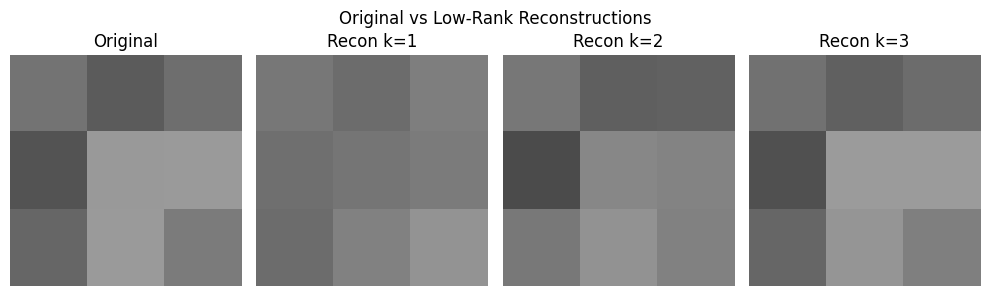

In [ ]:
pick = 0
orig = A[pick].reshape(3,3)

plt.figure(figsize=(10,3))
plt.subplot(1,4,1)
plt.imshow(orig, cmap='gray', vmin=0, vmax=255)
plt.title('Original')
plt.axis('off')

for i, k in enumerate([1,2,3], start=2):
    Ak = reconstruct_with_k(k)[pick].reshape(3,3)
    plt.subplot(1,4,i)
    plt.imshow(Ak, cmap='gray', vmin=0, vmax=255)
    plt.title(f'Recon k={k}')
    plt.axis('off')

plt.suptitle('Original vs Low-Rank Reconstructions')
plt.tight_layout()
plt.show()
